## Ejercicio 10

Dada la siguiente tabla con mediciones de 2 características correspondientes a mediciones de altura y peso de personas:

<div style="display: flex; justify-content: center;">
  <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; text-align: center;">
    <tbody>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Altura</td>
		<td>1.65</td> <td>1.81</td> <td>1.70</td> <td>1.62</td> <td>1.74</td> <td>1.70</td> <td>1.80</td> <td>1.73</td> <td>1.68</td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Peso</td>
        <td>75</td> <td>86</td> <td>82</td> <td>78</td> <td>77</td> <td>87</td> <td>90</td> <td>83</td> <td>80</td>
      </tr>
    </tbody>
  </table>
</div>

### a) Aplique las siguientes normalizaciones y grafíquelas con un diagrama de caja:

$$
MinMax: \frac{x_{i}-min(x)}{max(x)- min(x)}\quad\quad\quad\quad Standard: \frac{x_{i} - media(x)}{stddev(x)} \quad\quad\quad\quad Robust: \frac{x_{i} - Q1(x)}{Q3(x)-Q1(x)}
$$

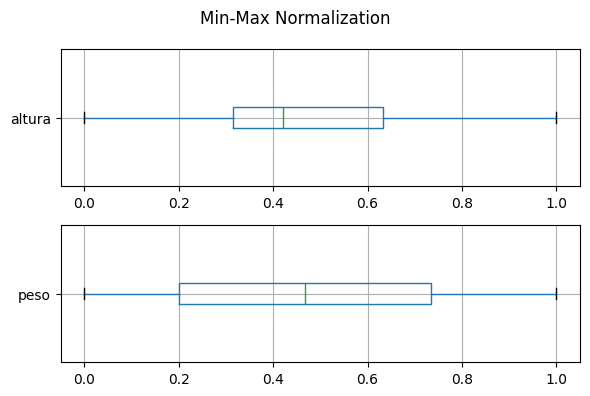

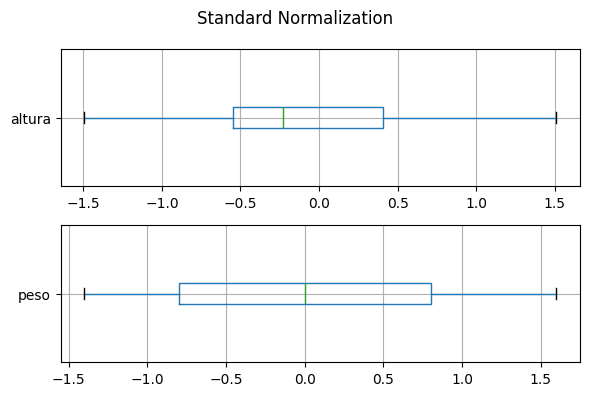

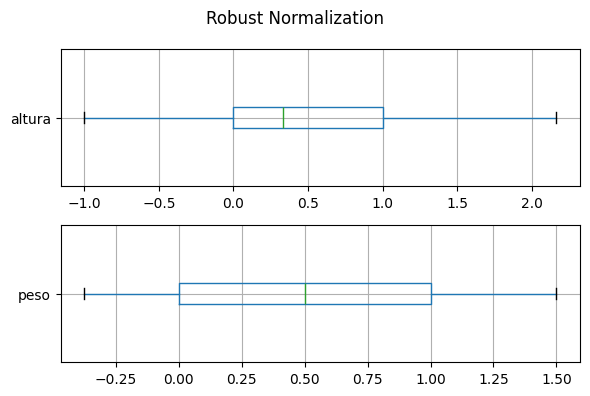

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_from_data(given_data):
    # --- Min-Max Normalization ---
    min_max_normalized_data = (given_data - given_data.min()) / (given_data.max() - given_data.min())
    fig, axes = plt.subplots(2, 1, figsize=(6, 4))  # 2 filas, 1 columna
    min_max_normalized_data.boxplot(column=['altura'], vert=False, ax=axes[0])
    min_max_normalized_data.boxplot(column=['peso'], vert=False, ax=axes[1])
    fig.suptitle("Min-Max Normalization")
    plt.tight_layout()
    plt.show()

    # --- Standard Normalization ---
    standard_normalized_data = (given_data - given_data.mean()) / given_data.std()
    fig, axes = plt.subplots(2, 1, figsize=(6, 4))
    standard_normalized_data.boxplot(column=['altura'], vert=False, ax=axes[0])
    standard_normalized_data.boxplot(column=['peso'], vert=False, ax=axes[1])
    fig.suptitle("Standard Normalization")
    plt.tight_layout()
    plt.show()

    # --- Robust Normalization ---
    robust_normalized_data = (given_data - given_data.quantile(0.25)) / (given_data.quantile(0.75) - given_data.quantile(0.25))
    fig, axes = plt.subplots(2, 1, figsize=(6, 4))
    robust_normalized_data.boxplot(column=['altura'], vert=False, ax=axes[0])
    robust_normalized_data.boxplot(column=['peso'], vert=False, ax=axes[1])
    fig.suptitle("Robust Normalization")
    plt.tight_layout()
    plt.show()



data = pd.DataFrame(
    {
		"altura": [1.65, 1.81, 1.7, 1.62, 1.74, 1.7, 1.8, 1.73, 1.68],
		"peso": [75, 86, 82, 78, 77, 87, 90, 83, 80]
	}
)

normalize_from_data(data)


### b) Agregue la siguiente medición (2.20, 120) y repita el punto a)

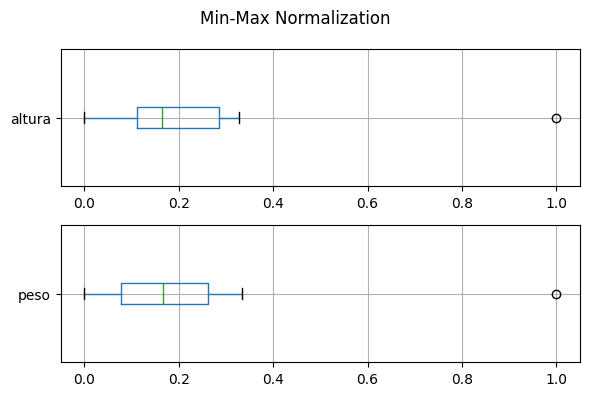

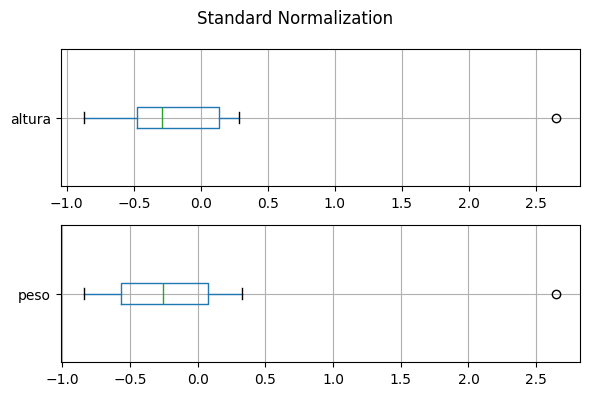

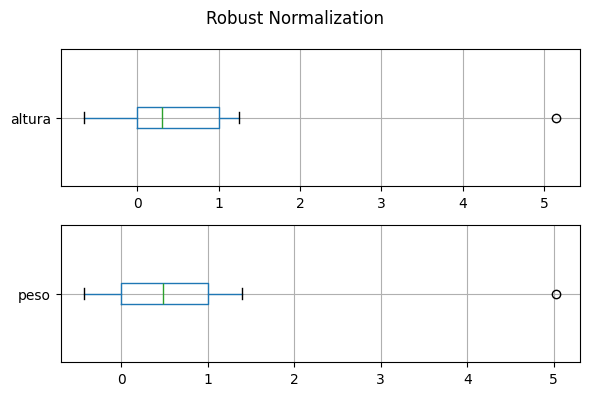

In [2]:
new_row = pd.DataFrame({"altura": [2.2], "peso": [120]})
new_data = pd.concat([data, new_row], ignore_index=True)
normalize_from_data(new_data)

### c) Compare los diagramas de caja entre las normalizaciones de los puntos a) y b) y comente las diferencias.

##### Respecto al Min-Max

Sin tener un valor atípico (a) los bigotes van entre 0 y 1. Cuando se introduce un valor atípico (b) esto cambia: ahora los valores se aplanan cerca del "0". El valor atípico se sitúa en el 1.

##### Respecto al Standard

Outliers quedan más evidentes en los boxplots, alejados de la mayoría. Los bigotes se comprimieron al agregar el valor atípico.

##### Respecto al Robust

Outliers quedan más evidentes en los boxplots. Los bigotes se mantienen más parecidos a la versión sin valores atípicos.